2021-04-19 00:17:01.748962: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-04-19 00:17:01.748999: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


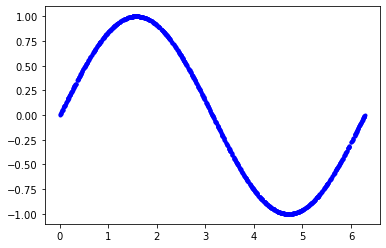

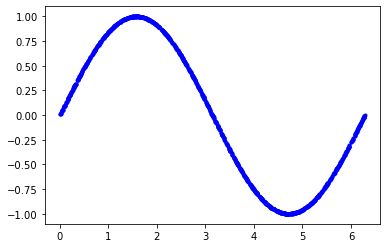

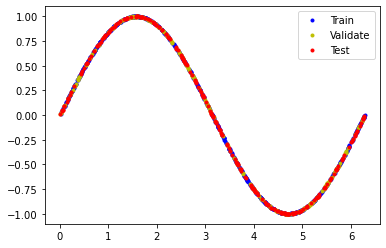

2021-04-19 00:17:13.015478: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-19 00:17:13.015763: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-04-19 00:17:13.015784: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-04-19 00:17:13.015807: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mayank-Lenovo-G50-70): /proc/driver/nvidia/version does not exist
2021-04-19 00:17:13.016097: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow wit

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [1]:
# TensorFlow is an open source machine learning library
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

# We'll use Keras to create a simple model architecture
# Note: Changed tf.keras below to tensorflow.keras (code from the book)
from tensorflow.keras import layers

# Define the number of nodes in each layer of the network
# Layer1 with 24 and Layer2 with 16 nodes is better than 16 and 24 respectively.
DENSE1_SIZE = 16
DENSE2_SIZE = 16
NUM_OF_EPOCHS = 900 #Changed 1500 to 900 because no change in loss after 800 
BATCH_SIZE = 16

# We'll generate this many sample datapoints
SAMPLES = 1200
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
# You can generate only a half of the sine wave by changing high from 2pi to pi
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)
# Calculate the corresponding sine values
y_values = np.sin(x_values)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

# Add a small random number to each y value
# When the number of Layer 1 and 2 nodes are increased, the noise level
# from 0.001 to some higher value (0.01, etc) still impacts less the quality
# of predictions.
y_values += 0.001 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

# Activation function used here is relu (Rectified Linear Unit)
def relu(input):
    return max(0.0, input)

model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(DENSE1_SIZE, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(DENSE2_SIZE, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()



In [2]:
# 0. Did not get the same accurate predection as shown in the book epochs=600
# 1. So, increased the epochs from 600 to 1000 to see if there is any improvement
# Saw a great improvment on the negative cycle, which was closer to actual
# 2. Increased the epochs still further from 1000 to 1200 to see if it improves further
# 3. Still some error near negative peak, so changed it from 1200 to 1500
# 4. So far, the batch size was kept at 16. Now epochs=1500 and batch_size=32 tried out
# The previous run +v peak also got affected a bit, but -ve peak became better
# 5. Change now epochs=1500 and batch_size=64, it became worse.
# 6. Went back to epochs=1500 and batch_size=16
# 7. Error does not improve beyond Epoch=1000, so reduced it from 1500 to 1000
history_2 = model_2.fit(x_train, y_train, epochs=NUM_OF_EPOCHS, batch_size=BATCH_SIZE,
validation_data=(x_validate, y_validate))


2021-04-19 00:17:13.209997: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-04-19 00:17:13.309310: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1895655000 Hz


Epoch 1/900
45/45 [==============================] - 2s 19ms/step - loss: 0.4744 - mae: 0.5630 - val_loss: 0.3609 - val_mae: 0.5206
Epoch 2/900
45/45 [==============================] - 0s 3ms/step - loss: 0.3610 - mae: 0.5217 - val_loss: 0.3133 - val_mae: 0.4904
Epoch 3/900
45/45 [==============================] - 0s 3ms/step - loss: 0.2819 - mae: 0.4631 - val_loss: 0.2657 - val_mae: 0.4556
Epoch 4/900
45/45 [==============================] - 0s 3ms/step - loss: 0.2474 - mae: 0.4353 - val_loss: 0.2361 - val_mae: 0.4308
Epoch 5/900
45/45 [==============================] - 0s 3ms/step - loss: 0.2194 - mae: 0.4164 - val_loss: 0.1945 - val_mae: 0.3897
Epoch 6/900
45/45 [==============================] - 0s 3ms/step - loss: 0.1955 - mae: 0.3924 - val_loss: 0.1727 - val_mae: 0.3691
Epoch 7/900
45/45 [==============================] - 0s 3ms/step - loss: 0.1779 - mae: 0.3709 - val_loss: 0.1611 - val_mae: 0.3562
Epoch 8/900
45/45 [==============================] - 0s 4ms/step - loss: 0.1808 - 

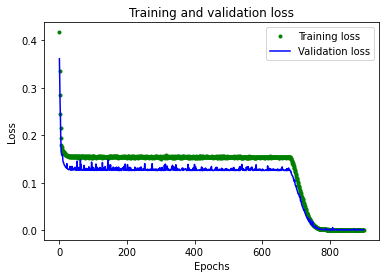

In [3]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


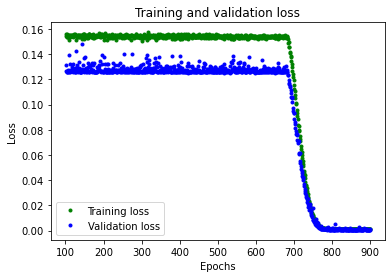

In [4]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

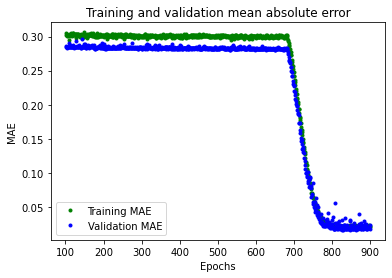

In [5]:
#Finally, we plot the mean absolute error for the same set of epochs:
plt.clf()
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


8/8 [==============================] - 0s 2ms/step - loss: 8.8159e-04 - mae: 0.0219


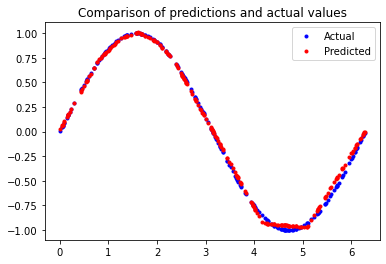

In [6]:
#This cell will evaluate our model against our test data:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()


In [7]:
# The below extraction code is from the ref:
# Ref: https://github.com/keras-team/keras/issues/91
# Get the weights and biases of each layer from the model
# print out the weight coefficients of first layer

# To use this code below from other file, the following assignment done
model = model_2

kernel_1, bias_1 = model.layers[0].get_weights()
print('\nkernel_1:\n')
print(kernel_1)

#*********
lenK1 = len(kernel_1[0])
print('\n kernel_1[0] size:\n', lenK1)

for i in range(lenK1-1):
    print(' ',  kernel_1[0][i], 'f,', sep='', end='')

print(' ', kernel_1[0][lenK1-1], 'f\n', sep='')
#*********

print('\nbias_1:\n')
print(bias_1)
print()

#*********
lenB1 = len(bias_1)
print('\n bias_1[0] size:\n', lenB1)

for i in range(lenB1-1):
    print(' ',  bias_1[i], 'f,', sep='', end='')

print(' ', bias_1[lenB1-1], 'f\n', sep='')
#*********

# print out the weight coefficients of second layer before output node
kernel_2, bias_2 = model.layers[1].get_weights()
print('\nkernel_2:\n')
print(kernel_2)

#*********
lenK2a = len(kernel_2) # list of lists
lenK2b = len(kernel_2[0])

print('\n lenK2a and lenK2b:\n', lenK2a, lenK2b)

for i in range(len(kernel_2)-1):
    listObj = kernel_2[i]
    for j in range(len(listObj)):    
        print(' ',  listObj[j], 'f,', sep='', end='')

for i in range(len(kernel_2[lenK2a-1])-1):
    print(' ',  kernel_2[lenK2a-1][i], 'f,', sep='', end='')

print(' ', kernel_2[lenK2a-1][lenK2b-1], 'f\n', sep='')

#*********

print('\nbias:_2\n')
print(bias_2)
print()

#*********
lenB2 = len(bias_2)
print('\n bias_2[0] size:\n', lenB2)

for i in range(lenB2-1):
    print(' ',  bias_2[i], 'f,', sep='', end='')

print(' ', bias_2[lenB2-1], 'f\n', sep='')
#*********

# print out the weight coefficients of third output layer
kernel_3, bias_3 = model.layers[2].get_weights()
print('\nkernel_3:\n')
print(kernel_3)

#*********
lenK3a = len(kernel_3)
lenK3b = len(kernel_3[0])

print('\n lenK4a\n', lenK3a)

for i in range(len(kernel_3)-1):
    listObj = kernel_3[i]
    for i in range(len(listObj)):    
        print(' ',  listObj[i], 'f,', sep='', end='')

print(' ', kernel_3[lenK3a-1][lenK3b-1], 'f\n', sep='')

#*********

print('\nbias:_3\n')
print(bias_3)
print()

#*********
lenB3 = len(bias_3)
print('\n bias_3[0] size:\n', lenB3)

for i in range(lenB3-1):
    print(' ',  bias_3[i], 'f,', sep='', end='')

print(' ', bias_3[lenB3-1], 'f\n', sep='')
#*********



kernel_1:

[[-0.01646274 -0.03910673  0.22360785  0.5998346  -0.00103298 -0.55691046
  -0.19404423  0.21088324 -0.0489949  -0.57329893  0.23929079 -0.05820966
  -0.27140924  0.04475855 -0.2555601  -0.03094506]]

 kernel_1[0] size:
 16
 -0.016462743f, -0.03910673f, 0.22360785f, 0.5998346f, -0.0010329824f, -0.55691046f, -0.19404423f, 0.21088324f, -0.0489949f, -0.57329893f, 0.23929079f, -0.058209658f, -0.27140924f, 0.04475855f, -0.2555601f, -0.030945063f


bias_1:

[ 0.0000000e+00  4.6588844e-01  4.0912434e-01 -4.8193464e-01
 -7.3178275e-04  0.0000000e+00  0.0000000e+00 -2.6472634e-01
  0.0000000e+00  0.0000000e+00 -5.0742084e-01  0.0000000e+00
  0.0000000e+00  9.2502546e-01  1.0671297e+00  0.0000000e+00]


 bias_1[0] size:
 16
 0.0f, 0.46588844f, 0.40912434f, -0.48193464f, -0.00073178275f, 0.0f, 0.0f, -0.26472634f, 0.0f, 0.0f, -0.50742084f, 0.0f, 0.0f, 0.92502546f, 1.0671297f, 0.0f


kernel_2:

[[ 1.73219770e-01  2.10388154e-01  3.57659787e-01 -1.47004128e-02
   3.96892697e-01  1.973033

In [8]:
# Function to convert some hex values into an array for C programming
import time, sys

def hex_to_c_array(model, file_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + file_name.upper() + '_H\n'
    c_str += "#define " + file_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Mayank Pratap Shahi \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(sys.version) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n\n'
    
# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(DENSE1_SIZE) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(DENSE2_SIZE) + ';\n\n'    
    
# Declare C variables
#****
    kernel_1, bias_1 = model.layers[0].get_weights()
    lenK1 = len(kernel_1[0])
    print('\n kernel_1[0] size:\n', lenK1)
    
    c_str += 'float ' + 'W1_data' + '[] = {\n   '  
    for i in range(lenK1-1):
      c_str += "%s%f%s" % (' ', kernel_1[0][i], 'f,')
      print(' ',  kernel_1[0][i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', kernel_1[0][lenK1-1], 'f\n};\n\n')
    print(' ', kernel_1[0][lenK1-1], 'f\n', sep='')
#****

#****
    lenB1 = len(bias_1)
    print('\n lenB1:\n', lenB1)
    
    c_str += 'float ' + 'b1_data' + '[] = {\n   '    
    for i in range(lenB1-1):
      c_str += "%s%f%s" % (' ', bias_1[i], 'f,')
      print(' ',  bias_1[i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', bias_1[lenB1-1], 'f\n};\n\n')
    print(' ', bias_1[lenB1-1], 'f\n', sep='')
#****

#****
# print out the weight coefficients of second layer before output node
    kernel_2, bias_2 = model.layers[1].get_weights()
    lenK2a = len(kernel_2) # list of lists
    lenK2b = len(kernel_2[0])
    print('\n lenK2a:\n', lenK2a)
    print('\n lenK2b:\n', lenK2b)

    c_str += 'float ' + 'W2_data' + '[] = {\n   '

    for i in range(lenK2a-1):
        listObj = kernel_2[i]
        for j in range(len(listObj)):
            c_str += "%s%f%s" % (' ', listObj[j], 'f,')
            print(' ',  listObj[j], 'f,', sep='', end='')    

    for i in range(len(kernel_2[lenK2a-1])-1):
        c_str += "%s%f%s" % (' ', kernel_2[lenK2a-1][i], 'f,')            
        print(' ',  kernel_2[lenK2a-1][i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', kernel_2[lenK2a-1][lenK2b-1], 'f\n};\n\n')
    print(' ', kernel_2[lenK2a-1][lenK2b-1], 'f\n', sep='')     
#****

#****
    lenB2 = len(bias_2)
    print('\n lenB2:\n', lenB2)
    
    c_str += 'float ' + 'b2_data' + '[] = {\n   '    
    for i in range(lenB2-1):
      c_str += "%s%f%s" % (' ', bias_2[i], 'f,')
      print(' ',  bias_2[i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', bias_2[lenB2-1], 'f\n};\n\n')
    print(' ', bias_2[lenB2-1], 'f\n', sep='')
#****

#***
# print out the weight coefficients of third output layer
    kernel_3, bias_3 = model.layers[2].get_weights()

#*********
    lenK3a = len(kernel_3)
    lenK3b = len(kernel_3[0])
    print('\n lenK3a:\n', lenK3a)
    print('\n lenK3b:\n', lenK3b)
    
    c_str += 'float ' + 'W3_data' + '[] = {\n   '    
    for i in range(lenK3a-1):
        listObj = kernel_3[i]
        for i in range(len(listObj)):
            c_str += "%s%f%s" % (' ', listObj[i], 'f,')           
            print(' ',  listObj[i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', kernel_3[lenK3a-1][lenK3b-1], 'f\n};\n\n')
    print(' ', kernel_3[lenK3a-1][lenK3b-1], 'f\n', sep='')

#****
#****
    lenB3 = len(bias_3)
    print('\n lenB3:\n', lenB3)
    
    c_str += 'float ' + 'b3_data' + '[] = {\n   '    
    for i in range(lenB3-1):
      c_str += "%s%f%s" % (' ', bias_3[i], 'f,')
      print(' ',  bias_3[i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', bias_3[lenB3-1], 'f\n};\n\n')
    print(' ', bias_3[lenB3-1], 'f\n', sep='')
#****

# Close out header guard
    c_str += '#endif //' + file_name.upper() + '_H'
  
    return c_str

In [9]:
# Write TFLite model to a C source (or header) file
with open("sine_2L_model_data" + '.h', 'w') as file:
    file.write(hex_to_c_array(model_2, "sine_2L_model_data"))

This model data was generated on: Mon Apr 19 00:19:22 2021
Tools used: Python: 3.7.10 (default, Feb 26 2021, 18:47:35) 
[GCC 7.3.0] 
 Numpy: 1.19.2 
 TensorFlow: 3.7.10 (default, Feb 26 2021, 18:47:35) 
[GCC 7.3.0] 
 Keras:  2.4.0 



 kernel_1[0] size:
 16
 -0.016462743f, -0.03910673f, 0.22360785f, 0.5998346f, -0.0010329824f, -0.55691046f, -0.19404423f, 0.21088324f, -0.0489949f, -0.57329893f, 0.23929079f, -0.058209658f, -0.27140924f, 0.04475855f, -0.2555601f, -0.030945063f


 lenB1:
 16
 0.0f, 0.46588844f, 0.40912434f, -0.48193464f, -0.00073178275f, 0.0f, 0.0f, -0.26472634f, 0.0f, 0.0f, -0.50742084f, 0.0f, 0.0f, 0.92502546f, 1.0671297f, 0.0f


 lenK2a:
 16

 lenK2b:
 16
 0.17321977f, 0.21038815f, 0.3576598f, -0.014700413f, 0.3968927f, 0.19730338f, 0.18750581f, -0.18924597f, -0.049940675f, -0.088672996f, 0.18579242f, -0.11004579f, 0.3256444f, -0.22682346f, 0.05103141f, -0.3606248f, 0.016901553f, -0.16971888f, -0.15812975f, 0.2021054f, 0.12044355f, 0.5415049f, 0.44213593f, 0.5077952f, 0